<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Regresión Lineal </h2> 

---

# Aspectos teóricos

## Introducción

La **regresión lineal**, es un modelo matemático que busca establecer la relación de dependencia entre un conjunto de variables explicativas $x_1,x_2,\ldots,x_n$ y una variable respuesta continua $y$.

En el caso de una variable (**regresión lineal simple**), esta ecuación corresponde al de una recta:
$$y = \beta_0 + \beta_1 x $$

Aquí, el peso $\beta_0$ representa la intersección con respecto al eje $y$, y $\beta_1$ el coeficiente de la variable explicatoria $x$. La meta es que el modelo aprenda los valores de los pesos de la ecuación lineal que describe la relación entre la variable explicativa y la variable objetivo. Esto nos permitirá predecir la respuesta de nuevos valores de la variable explicativa para valores que no se encuentran en el conjunto de datos de entrenamiento.

<img align="center" src="imagenes/Linear_regression.png"  width="400" height="550">

## Modelo General

Un modelo de **regresión lineal múltiple** tiene la siguiente forma:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon$$

donde:

* $y$ es la variable objetivo, target o respuesta.
* $x_1, x_2,\ldots, x_n$, son las variables independientes, explicativas, o regresoras.
* $\beta_0,\beta_1,\beta_2,\ldots, \beta_n$, son los parámetros a determinar en el modelo y miden la influencia de cada una de las variables asociadas.
* $\epsilon$ representa el error que se genera en el modelo

## Hipótesis del modelo

1. **Linealidad**. Los valores de la variable dependiente están generados por el modelo lineal: 

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon$$


2. **Independencia lineal**. No existe relación entre las variables explicativas.


3. **Homocedasticidad**. Todas las perturbaciones tienen las misma varianza, $Var(\epsilon_i)=\sigma^2$


4. **Normalidad**. Los errores tienen una distribución normal, $\epsilon \approx N(0,\sigma^2)$

## Método clásico para la estimación de los coeficientes o parámetros del modelo.

El método de **mínimos cuadrados ordinario**, por sus siglas en inglés (OLS), consiste en minimizar el error de los cuadrados de los errores que se comenten al aproximar los valores de $y$ por $\hat y$. Esto seria de la siguiente forma:
$$ L(\hat\beta_0, \hat \beta_1) = \min_{\hat\beta_0, \hat \beta_1} = \sum_{i = 1}^{n} \epsilon_{i}^2 = \sum_{i = 1}^{n} (y_i - \hat y_i)^2 = \sum_{i = 1}^{n} (y_i -\hat\beta_0 - \hat\beta_1 x_i)^2$$

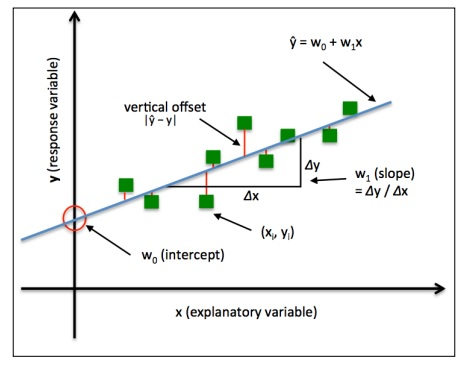

<div style="text-align: right"> Fuente: Raschka, Sebastian. Python Machine Learning </div>

### 1. Función objetivo:
$$ \min L(\hat\beta_0, \hat \beta_1) = \sum_{i = 1}^{n} (y_i -\hat\beta_0 - \hat\beta_1 x_i)^2$$

### 2. Condiciones:

$$\left\{
\begin{array}{rcl}
     \displaystyle\frac{\partial L}{\partial \hat\beta_0} & = &  \displaystyle -2 \sum_{i=1}^{n} (y_i -\hat\beta_0 -\hat\beta_1 x_i) = 0
   \\  \displaystyle\frac{\partial L}{\partial \hat\beta_1} & = &  \displaystyle-2 \sum_{i=1}^{n} (y_i -\hat\beta_0 -\hat\beta_1 x_i)x_i =0
\end{array}
\right.$$

### 3. Solución:

$$\left\{
\begin{array}{rcl}
     \displaystyle\hat \beta_0  & = &  \displaystyle\bar y - \hat\beta_1 \bar x
   \\  \displaystyle\hat \beta_1  & = & \displaystyle\frac{\sum_{i=1}^{n}(y_i - \bar y)(x_i - \bar x)}{\sum_{i=1}^{n}(x_i - \bar x)^2}= \frac{Cov(x,y)}{Var(x)} = (X^{t}X)^{-1}X^{t}y
\end{array}
\right. $$



# Práctica

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Problema

AL revisar los datos de una compañia de venta de equipos se observa que parece haber una relación entre el número de llamadas de ventas y el número unidades vendidas. Es decir, los veendedores que hicieron más llamadas de ventas, hicieron un mayor número de ventas. Sin embargo la relación no es perfecta o exacta, hay algunos casos donde no se mantuvo esta relación. 

Ajustar un modelo de **regresión lineal simple** que relaciones el número de ventas con el número de equipos vendidos.

### Dataset del problema

In [4]:
df = pd.read_csv('datos/dataset.csv')

In [5]:
df.head(12)

,llamadas,ventas
0,10.0,18.0
1,11.0,27.0
2,12.0,28.0
3,12.0,19.0
4,13.0,29.0
5,14.0,24.0
6,14.0,25.0
7,15.0,27.0
8,15.0,31.0
9,16.0,31.0


### Gráfica de los datos

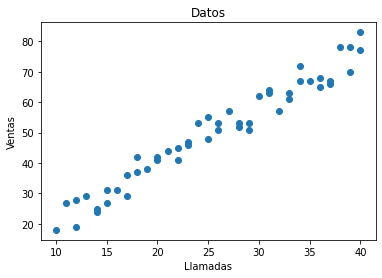

In [6]:
plt.scatter(df['llamadas'], df['ventas'])
plt.xlabel('Llamadas')
plt.ylabel('Ventas')
plt.title('Datos')
plt.show()

## Modelo a ajustar
$$\mbox{nro_ventas} = \beta_0 + \beta_1\mbox{(nro_llamadas)}$$

#### Datos de entrenamiento

In [7]:
frac = 0.7 # Proporción de datos para el entrenamiento
datos_train = df.sample(frac=frac,random_state=42)

In [8]:
datos_train.head(10)

,llamadas,ventas
13,18.0,42.0
39,34.0,72.0
30,29.0,51.0
45,38.0,78.0
17,21.0,44.0
48,40.0,77.0
26,26.0,51.0
25,26.0,53.0
32,30.0,62.0
19,22.0,45.0


In [9]:
datos_test = df[~df.index.isin(datos_train.index)]

#### Datos de test

In [10]:
datos_test.head(10)

,llamadas,ventas
2,12.0,28.0
7,15.0,27.0
10,17.0,29.0
14,19.0,38.0
18,22.0,41.0
20,23.0,47.0
22,24.0,53.0
23,25.0,55.0
28,28.0,52.0
35,32.0,57.0


In [11]:
X = np.array(datos_train['llamadas'])
Y = np.array(datos_train['ventas'])

In [12]:
X = X[:,np.newaxis]

In [13]:
Y = Y[:,np.newaxis]

### Calculo de coeficiente

$$\left\{
\begin{array}{rcl}
     \displaystyle\hat \beta_0  & = &  \displaystyle\bar y - \hat\beta_1 \bar x
   \\  \displaystyle\hat \beta_1  & = &  (X^{t}X)^{-1}X^{t}y
\end{array}
\right. $$

In [37]:
beta1 = float(np.linalg.inv(X.T@X)@X.T@Y)

In [38]:
beta1

1.9605705717874946

In [39]:
beta0 = float(Y.mean() - beta1*X.mean())
beta0

0.2714499910269197

### Grafica de la recta de regresión ajustada

In [40]:
u = np.linspace(10,40)
v = beta0 + beta1*u

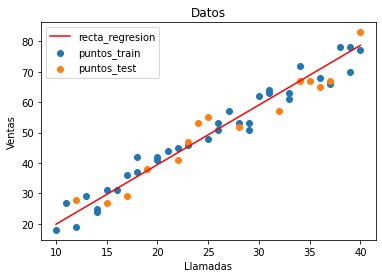

In [41]:
plt.plot(u,v,'r',label='recta_regresion')
plt.scatter(datos_train['llamadas'], datos_train['ventas'],label='puntos_train')
plt.scatter(datos_test['llamadas'], datos_test['ventas'],label='puntos_test')
plt.xlabel('Llamadas')
plt.ylabel('Ventas')
plt.title('Datos')
plt.legend()
plt.show()

### Predicción y Error

In [19]:
def prediccion(val):
    return beta0 + beta1*val

In [20]:
predicho = prediccion(datos_test['llamadas'])

In [21]:
resultado ={'valor_real':datos_test['ventas'],'prediccion':predicho}
R = pd.DataFrame(data=resultado)
R.head(10)

,valor_real,prediccion
2,28.0,23.798297
7,27.0,29.680009
10,29.0,33.601150
14,38.0,37.522291
18,41.0,43.404003
20,47.0,45.364573
22,53.0,47.325144
23,55.0,49.285714
28,52.0,55.167426
35,57.0,63.009708


In [22]:
def error(real,pred):
    return np.sum((real-pred)**2)/len(real)

In [23]:
error_cuadratico = error(R['valor_real'],R['prediccion'])

In [24]:
print('ECM = {:3f}'.format(error_cuadratico))

ECM = 17.056588


## Estimación de coeficientes de regresión usando scikit-learn 

In [1]:
 from sklearn.linear_model import LinearRegression

In [2]:
 modelo = LinearRegression()

In [25]:
modelo.fit(X,Y)

LinearRegression()

In [31]:
print('beta0 = {:3f}'.format(float(modelo.coef_)))

beta0 = 1.875803


In [32]:
print('beta1 = {:3f}'.format(float(modelo.intercept_)))

beta1 = 2.390639


In [35]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red') 
    return None

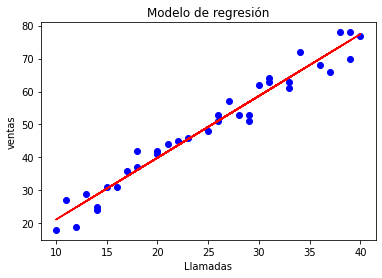

In [44]:
lin_regplot(X, Y, modelo)
plt.title('Modelo de regresión')
plt.xlabel('Llamadas')
plt.ylabel('ventas')
plt.show()

In [53]:
X_test = np.array(datos_test['llamadas'])
X_test = X_test[:,np.newaxis]

In [54]:
prediccion = modelo.predict(X_test)

### Predicción

In [57]:
resultado ={'valor_real':datos_test['ventas'],'prediccion':predicho}
R = pd.DataFrame(data=resultado)
R.head(10)

,valor_real,prediccion
2,28.0,23.798297
7,27.0,29.680009
10,29.0,33.601150
14,38.0,37.522291
18,41.0,43.404003
20,47.0,45.364573
22,53.0,47.325144
23,55.0,49.285714
28,52.0,55.167426
35,57.0,63.009708


### Error cuadratico medio

In [56]:
Y_test =  np.array(datos_test['ventas'])
Y_test = Y_test[:,np.newaxis]
error(Y_test,prediccion)

16.06332876707672